In [1]:
import zipfile 
zip_ref=zipfile.ZipFile("test_set.zip","r")
zip_ref.extractall()
zip_ref.close()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np

In [3]:
import tensorflow as tf
test_dir=r"C:\Users\shree\Downloads\DEEP LEARNING\test_set"

In [4]:
import tensorflow.keras as keras
train=keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)


Found 2023 files belonging to 2 classes.


In [5]:
for images,labels in train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [6]:
def process(image,label):
    image=image=255
    return image,label
train=train.map(process)
train
images
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int32)>

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(180,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\shree\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
evl=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
x=np.array(images)
y=np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
early_stop=EarlyStopping(monitor='accuracy',patience=10,restore_best_weights=True)

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6400 - loss: 3.8177 - val_accuracy: 0.2857 - val_loss: 1440.7273
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 1125.4656 - val_accuracy: 0.2857 - val_loss: 151.0782
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step - accuracy: 0.4000 - loss: 117.9810 - val_accuracy: 0.7143 - val_loss: 25.7978
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 36.0930 - val_accuracy: 0.7143 - val_loss: 8.8637
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step - accuracy: 0.6000 - loss: 12.9047 - val_accuracy: 0.2857 - val_loss: 2.2171
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5600 - loss: 1.2405 - val_accuracy: 0.7143 - val_loss: 2.0072
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 2.7329 - val_accuracy: 0.2857 - val_loss: 1.6793
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4400 - loss: 1.0624 - val_accuracy: 0.7143 - val_loss: 1.18

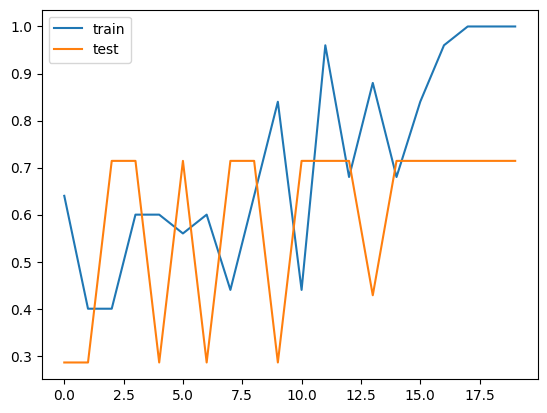

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

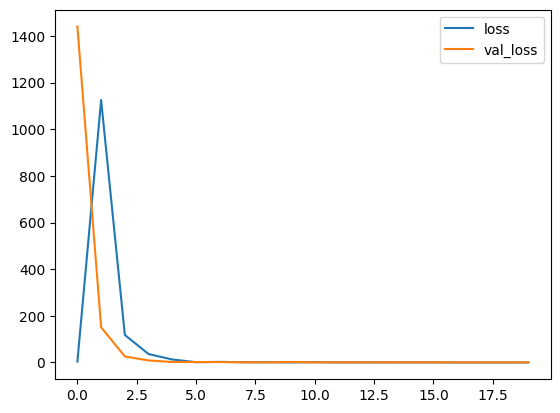

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [15]:
# ==============================
# 🎯 Make Predictions
# ==============================
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_height = 256
img_width = 256

class_names = ['cat', 'dog',]

img_path = r"C:\Users\shree\Downloads\DEEP LEARNING\proxy-image.jpg"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 *np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted emotion: cat
Confidence: 100.00%
